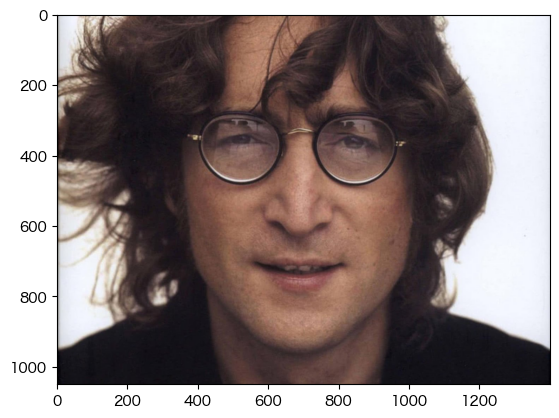

In [23]:
from PIL import Image, ImageDraw, ImageFilter 
import matplotlib.pyplot as plt
megane = Image.open("megane.jpeg")
lennon = Image.open("lennon.jpeg")
plt.imshow(megane)

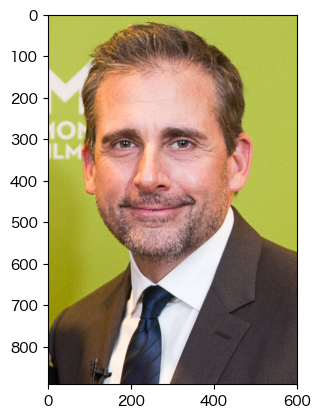

In [24]:
plt.imshow(lennon)

In [25]:
import cv2
import dlib
import numpy as np

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
megane = cv2.imread("megane.jpeg")
lennon = cv2.imread("lennon.jpeg")

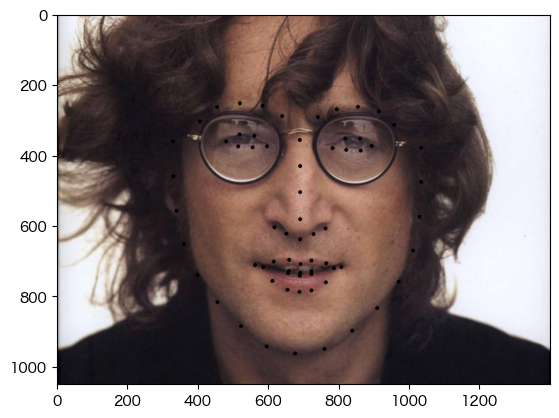

In [26]:
gray = cv2.cvtColor(megane, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)
for rect in rects:
    meganep = Image.open("megane.jpeg")
    draw = ImageDraw.Draw(meganep)
    shape = predictor(gray, rect)
    shape_np = np.zeros((68, 2), dtype=int)
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape_megane = shape_np

    for i, (x, y) in enumerate(shape_megane):
        draw.ellipse((x-5, y-5, x + 5, y + 5), fill=(0, 0, 0))

plt.imshow(meganep)

In [27]:
print(shape_megane)

[[ 329  361]
 [ 330  460]
 [ 339  558]
 [ 360  652]
 [ 399  740]
 [ 455  817]
 [ 522  885]
 [ 595  943]
 [ 676  963]
 [ 759  950]
 [ 838  898]
 [ 909  834]
 [ 970  759]
 [1011  671]
 [1029  575]
 [1034  476]
 [1034  379]
 [ 405  304]
 [ 454  264]
 [ 519  253]
 [ 583  260]
 [ 639  289]
 [ 740  292]
 [ 794  270]
 [ 854  263]
 [ 914  276]
 [ 957  314]
 [ 689  357]
 [ 690  431]
 [ 690  505]
 [ 690  582]
 [ 617  605]
 [ 651  623]
 [ 690  639]
 [ 728  624]
 [ 762  608]
 [ 480  361]
 [ 518  341]
 [ 560  345]
 [ 596  375]
 [ 555  378]
 [ 514  375]
 [ 782  380]
 [ 818  353]
 [ 860  353]
 [ 893  374]
 [ 862  387]
 [ 821  385]
 [ 562  712]
 [ 615  702]
 [ 659  697]
 [ 691  709]
 [ 722  699]
 [ 764  707]
 [ 807  718]
 [ 763  761]
 [ 722  784]
 [ 688  788]
 [ 654  782]
 [ 611  757]
 [ 585  718]
 [ 658  729]
 [ 690  735]
 [ 722  730]
 [ 786  721]
 [ 722  737]
 [ 689  742]
 [ 656  735]]


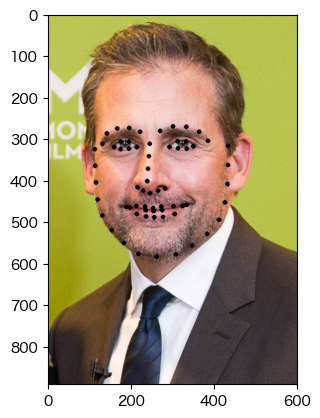

In [28]:
gray = cv2.cvtColor(lennon, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)
for rect in rects:
    lennonp = Image.open("lennon.jpeg")
    draw = ImageDraw.Draw(lennonp)
    shape = predictor(gray, rect)
    shape_np = np.zeros((68, 2), dtype=int)
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape_lennon = shape_np

    for i, (x, y) in enumerate(shape_lennon):
        draw.ellipse((x-5, y-5, x + 5, y + 5), fill=(0, 0, 0))

plt.imshow(lennonp)

In [29]:
vec_megane = shape_megane[27, :] - shape_megane[30, :]
vec_lennon = shape_lennon[27, :] - shape_lennon[30, :]
theta = np.arccos(np.dot(vec_megane, vec_lennon)/(np.linalg.norm(vec_megane) * np.linalg.norm(vec_lennon)))
ratio = np.linalg.norm(vec_lennon) / np.linalg.norm(vec_megane)
size = [meganep.size[0], meganep.size[1]]
print(size)
new_size = (np.array(size)*ratio).astype(int)
print(new_size)

[1400, 1050]
[561 420]


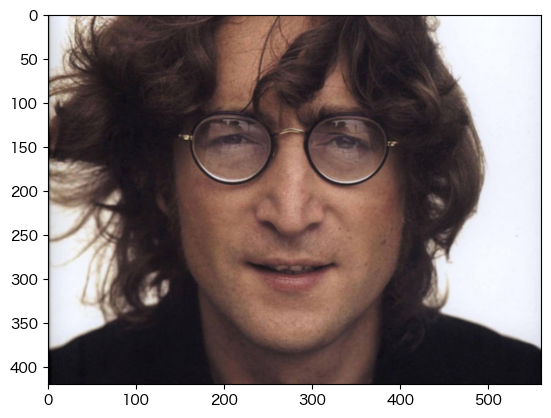

In [30]:
megane_resize = Image.open("megane.jpeg").resize(tuple(new_size))
plt.imshow(megane_resize)

In [31]:
megane_resize.save("megane_resize.jpeg")

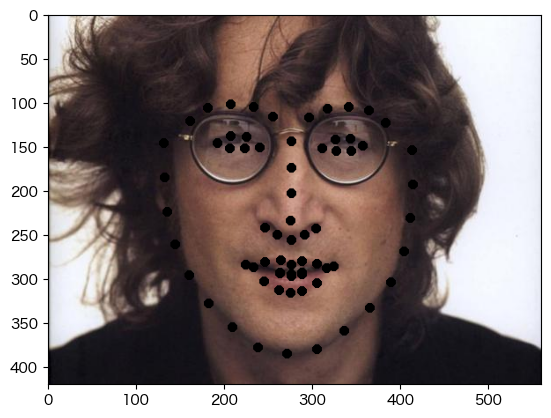

In [32]:
megane = cv2.imread("megane_resize.jpeg")
gray = cv2.cvtColor(megane, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)
for rect in rects:
    meganep = Image.open("megane_resize.jpeg")
    draw = ImageDraw.Draw(meganep)
    shape = predictor(gray, rect)
    shape_np = np.zeros((68, 2), dtype=int)
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape_megane = shape_np

    for i, (x, y) in enumerate(shape_megane):
        draw.ellipse((x-5, y-5, x + 5, y + 5), fill=(0, 0, 0))

plt.imshow(meganep)

In [33]:
vec_megane = shape_megane[27, :] - shape_megane[30, :]
vec_lennon = shape_lennon[27, :] - shape_lennon[30, :]
theta = np.arccos(np.dot(vec_megane, vec_lennon)/(np.linalg.norm(vec_megane) * np.linalg.norm(vec_lennon)))
ratio = np.linalg.norm(vec_lennon) / np.linalg.norm(vec_megane)
mat = ratio * np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])
v = shape_megane - shape_megane[30, :]
l = []
for vec in v:
    l.append(mat @ vec)

l = np.array(l)
new_a = l + shape_lennon[30, :]
new_a

array([[ 98.79940748, 305.94667325],
       [ 97.63362548, 345.02629305],
       [ 98.46907789, 384.21701025],
       [105.41933095, 421.73978521],
       [119.48500185, 457.65016665],
       [139.7210221 , 490.89198864],
       [165.23787187, 519.40846809],
       [192.97815085, 544.0335761 ],
       [225.60967782, 552.87100358],
       [259.90840637, 549.75657326],
       [292.09406246, 530.46562153],
       [322.55622763, 506.06048636],
       [348.18195285, 478.37575608],
       [365.13541538, 444.18738427],
       [374.25058635, 406.55277126],
       [379.36328848, 368.69596346],
       [380.52907049, 329.61634366],
       [130.20664116, 282.59770399],
       [151.05221578, 268.69941982],
       [177.29045797, 266.14121713],
       [203.13985928, 270.5873349 ],
       [224.54240217, 282.81619553],
       [265.51215899, 286.09430934],
       [287.08060733, 277.25465992],
       [311.20651771, 276.58659425],
       [333.9985187 , 281.86668313],
       [352.23256388, 296.93074929],
 

In [34]:
new_a = new_a.astype(int)
for i in range(68):
    print(new_a[i], shape_lennon[i])

[ 98 305] [112 325]
[ 97 345] [113 365]
[ 98 384] [115 405]
[105 421] [119 446]
[119 457] [130 485]
[139 490] [153 520]
[165 519] [182 551]
[192 544] [217 577]
[225 552] [261 584]
[259 549] [307 578]
[292 530] [346 557]
[322 506] [382 529]
[348 478] [411 495]
[365 444] [425 453]
[374 406] [431 409]
[379 368] [432 363]
[380 329] [432 317]
[130 282] [130 312]
[151 268] [141 287]
[177 266] [166 275]
[203 270] [195 274]
[224 282] [221 283]
[265 286] [269 281]
[287 277] [300 270]
[311 276] [332 271]
[333 281] [363 283]
[352 296] [384 305]
[243 312] [244 312]
[242 342] [242 342]
[240 371] [240 372]
[238 402] [238 402]
[208 408] [215 417]
[222 417] [228 425]
[237 424] [245 431]
[253 418] [264 425]
[266 412] [281 419]
[159 309] [159 320]
[175 302] [174 307]
[193 304] [194 307]
[207 317] [213 320]
[190 317] [194 324]
[173 316] [174 325]
[278 321] [292 320]
[294 312] [311 306]
[311 312] [331 306]
[324 321] [349 318]
[311 326] [333 324]
[294 325] [312 323]
[184 449] [188 464]
[206 447] [212 462]


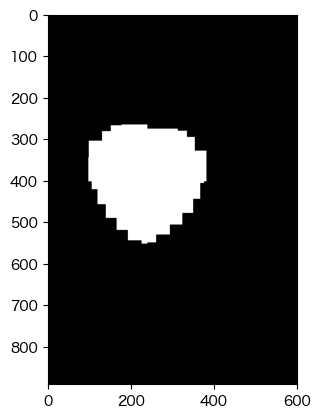

In [35]:
im = Image.new("L", lennonp.size, 0)
draw = ImageDraw.Draw(im)
for v in new_a:
    draw.rectangle((v[0], v[1], new_a[30, 0], new_a[30, 1]), fill=255)
plt.imshow(im, cmap="gray")

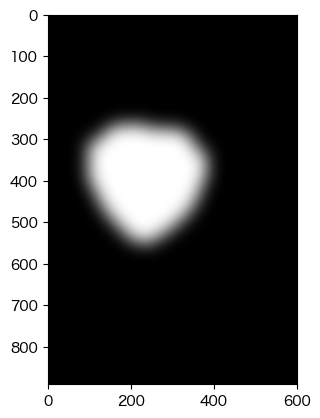

In [36]:
im_blur = im.filter(ImageFilter.GaussianBlur(20))
plt.imshow(im_blur, cmap="gray")

In [41]:
im_blur.size

(601, 891)

In [42]:
megane = Image.open("megane_resize.jpeg")
megane.size

(561, 420)

In [45]:
megane = Image.open("megane_resize.jpeg")
size = (max(im_blur.size[0], megane.size[0]), max(im_blur.size[1], megane.size[1]))
print(size)
print(megane.mode)

(601, 891)
RGB


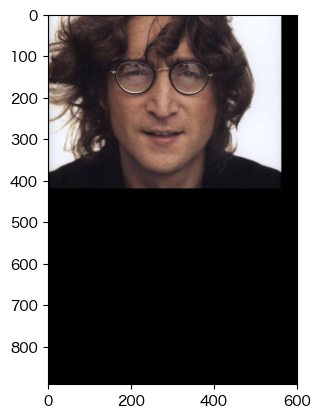

In [47]:
background = Image.new(megane.mode, size, (0, 0, 0))
background.paste(megane)
plt.imshow(background)
megane = background

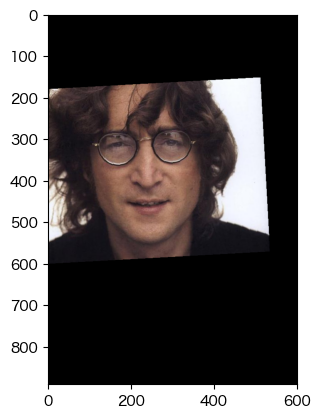

In [48]:
meganep_rotate = megane.rotate(np.rad2deg(theta), center=(shape_megane[30, 0], shape_megane[30, 1]),
                                translate=(shape_lennon[30, 0] - shape_megane[30, 0], 
                                           shape_lennon[30, 1] - shape_megane[30, 1]))
plt.imshow(meganep_rotate)

In [49]:
back_im = Image.open("lennon.jpeg")
back_im.size

(601, 891)

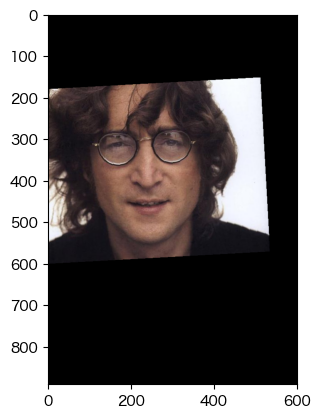

In [50]:
im_crop = meganep_rotate.crop((0, 0, back_im.size[0], back_im.size[1]))
plt.imshow(im_crop)

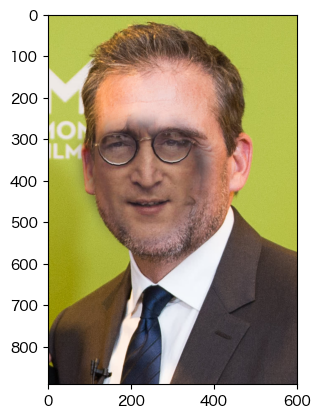

In [51]:
back_im.paste(im_crop, (0, 0), im_blur)
plt.imshow(back_im)